<a href="https://colab.research.google.com/github/S4vyss/machine-learning/blob/main/ComputerVision_(chapter_14).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercise 9**

In [48]:
pip install tensorflow-datasets

In [49]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train_full = X_train_full / 255.
X_test = X_test / 255.
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [50]:
len(X_train)

55000

In [51]:
len(X_valid)

5000

In [52]:
data_augmentation = tf.keras.Sequential([
    keras.layers.RandomFlip("horizontal_and_vertical"),
    keras.layers.RandomRotation(0.2),
])

X_train_augumented = data_augmentation(X_train)

In [53]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Conv2D(64, 7, activation='relu', padding='same', input_shape=(28, 28, 1)),

    keras.layers.Conv2D(64, 3, padding='same'),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(128, 3, padding='same'),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(256, 3, padding='same'),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(512, 3, padding='same'),
    keras.layers.Dropout(0.2),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D(),

    keras.layers.Flatten(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(), optimizer=tf.keras.optimizers.Lion(), metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 64)        3200      
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 dropout_8 (Dropout)         (None, 28, 28, 64)        0         
                                                                 
 batch_normalization_16 (Ba  (None, 28, 28, 64)        256       
 tchNormalization)                                               
                                                                 
 activation_8 (Activation)   (None, 28, 28, 64)        0         
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                 

In [54]:
#history = model.fit(X_train_augumented, y_train, epochs=10, validation_data=(X_valid, y_valid))

In [55]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 2.3034 - accuracy: 0.1107


[2.3034462928771973, 0.11069999635219574]

# Exercise 10

In [56]:
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.cifar100.load_data()

x_train, x_valid = x_train_full[:-5000], x_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [57]:
x_train.shape

(45000, 32, 32, 3)

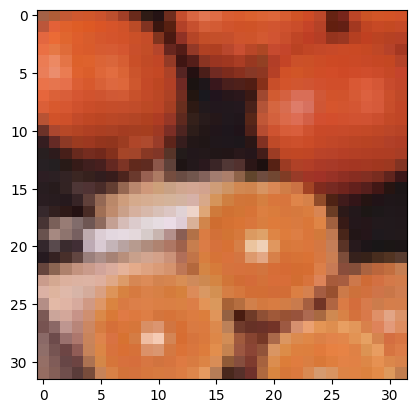

In [58]:
import matplotlib.pyplot as plt

image = x_train[1020]

plt.imshow(image)
plt.show()

In [59]:
y_train[:10]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1],
       [86],
       [90],
       [28],
       [23],
       [31]])

In [60]:
def preprocess(image):
  image = tf.image.random_flip_left_right(image)
  image = tf.image.random_flip_up_down(image)
  resized_image = tf.image.resize(image, [224, 224])
  final_image = keras.applications.xception.preprocess_input(resized_image)
  return final_image

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(buffer_size=10000).map(lambda x, y: (preprocess(x), y)).batch(batch_size=32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
valid_dataset = tf.data.Dataset.from_tensor_slices((x_valid, y_valid)).map(lambda x, y: (preprocess(x), y)).batch(batch_size=32).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.map(lambda x, y: (preprocess(x), y))
test_dataset = test_dataset.batch(batch_size=32)
test_dataset = test_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)

In [61]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.int64, name=None))>

In [62]:
base_model = keras.applications.xception.Xception(weights='imagenet', include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(100, activation='softmax')(avg)

model = keras.Model(inputs=base_model.input, outputs=output)

for layer in base_model.layers:
  layer.trainable = False

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, None, None, 32)       864       ['input_3[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, None, None, 32)       128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, None, None, 32)       0         ['block1_conv1_bn[0][0]'

In [64]:
optimizer = keras.optimizers.SGD(lr=0.2, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(train_dataset, epochs=5, validation_data=valid_dataset)

Epoch 1/5
1407/1407 [==============================] - 223s 155ms/step - loss: 2.1791 - accuracy: 0.4611 - val_loss: 1.8167 - val_accuracy: 0.5156
Epoch 2/5
1407/1407 [==============================] - 217s 154ms/step - loss: 1.6304 - accuracy: 0.5616 - val_loss: 1.6832 - val_accuracy: 0.5474
Epoch 3/5
1407/1407 [==============================] - 217s 154ms/step - loss: 1.5014 - accuracy: 0.5889 - val_loss: 1.6594 - val_accuracy: 0.5530
Epoch 4/5
1407/1407 [==============================] - 236s 168ms/step - loss: 1.4200 - accuracy: 0.6072 - val_loss: 1.6135 - val_accuracy: 0.5568
Epoch 5/5
1407/1407 [==============================] - 217s 154ms/step - loss: 1.3590 - accuracy: 0.6250 - val_loss: 1.5955 - val_accuracy: 0.5660


In [65]:
for layer in base_model.layers:
  layer.trainable=True

optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history = model.fit(train_dataset, epochs=5, validation_data=valid_dataset)

Epoch 1/5
1407/1407 [==============================] - 754s 526ms/step - loss: 1.1396 - accuracy: 0.6703 - val_loss: 1.0368 - val_accuracy: 0.6944
Epoch 2/5
1407/1407 [==============================] - 738s 524ms/step - loss: 0.6934 - accuracy: 0.7873 - val_loss: 0.9202 - val_accuracy: 0.7326
Epoch 3/5
1407/1407 [==============================] - 718s 510ms/step - loss: 0.4901 - accuracy: 0.8462 - val_loss: 0.8870 - val_accuracy: 0.7464
Epoch 4/5
1407/1407 [==============================] - 717s 509ms/step - loss: 0.3666 - accuracy: 0.8846 - val_loss: 0.8909 - val_accuracy: 0.7570
Epoch 5/5
1407/1407 [==============================] - 718s 510ms/step - loss: 0.2756 - accuracy: 0.9116 - val_loss: 0.7630 - val_accuracy: 0.7868
